# Silicon Valley Rent Segmentation

## Introduction

The Silicon Valley is one of the world's hub for technology and innovation. From long time companies like Intel and Hewlett-Packard, social media giants like Google, Facebook and Twitter to a plethora of startups - the Silicon Valley attracts high-skilled workers from all over the world.

When there is an influx of workforce into a region, the cost of living begins to increase. The Silicon Valley is currently going through a 'housing crisis' - with housing prices skyrocketing, affordability is a major issue. For someone moving to the Silicon Valley for a new job, buying a home might far from reach. The other option is finding a place to rent.

## Business Problem

In this study, we will be looking at how median rent for a two-bedroom apartment varies within each zip code of the Santa Clara County. For those who are new and moving to the area, it is best to know where the house rents are relatively low but also closer to social venues like restaurants, theatres, malls, parks, etc. This analysis plans to address this issue.

## Data Requirement and Collection

For this study I chose to divide Santa Clara county by zip code (since neighborhood were too small in size and cities with too big in size). Once I have the relevant zip codes for the respective regions in the county I need to merge the data with the median rent for a two-bedroom apartment. Further using Geocoder, find the coordinates for each zip code region and form this into a data set. Finally I will need data about the different venues in each region to help cluster similar regions. I will use Foursquare API to gather this information.

Once the data has been colected and processed, one should be able to view of a map with similar venue categories overlayed over a choropleth showing the median rent of that region.

**For example**, you can look for regions with Mexican restaurants and gyms in the neighborhood and comapre what the median rent in those regions are (this is a hypothetical example prior to running the code).

### The following data must be collected:
#### 1. A list of zip codes within the Santa Clara County
*I was able to scrap data from Santa Clara County Public Health website: https://www.sccgov.org/sites/phd/hi/hd/Pages/city-profiles.aspx. This provided a list of cities and neighborhoods within Santa Clara County along with zipcodes*
#### 2. Median rent for Santa Clara County by Zip code
*This data was scrapped from a real estate search website: https://www.zillow.com/santa-clara-county-ca/home-values/. This website provides the most upto date data on housing prices and rents. I was able to scrap the data for 2019 median rent for each zip code in the county.*
#### 3. Geo Locator for geographical coordinates of the county
*Importing Geocoder library to get the coordinates for Santa Clara County*
#### 4. List of venues in each neighborhood
*A list of venues in each neighborhood will be pulled from Foursquare API*
#### 5. Map generation
*Using Folium to generate maps in Python.*


## Importing Libraries

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geocoder
import geocoder as geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8ba116acdcca4616a4acef841eb821f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YVkH8_e4gIf88Aqh6AmRqXRfSoM5EsCzChOa3e8rjcb5',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')


## Importing Dataset as pandas

In [6]:
body = client_8ba116acdcca4616a4acef841eb821f1.get_object(Bucket='capstoneproject-donotdelete-pr-gec6h5x5axg3n2',Key='Santa Clara County Rents.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()

,Zip Code,Type,Single family Home,Rent
0,94022.0,Los Altos,"$2,140,800","$4,397"
1,94024.0,Los Altos,"$2,632,500","$3,710"
2,94028.0,Los Altos,"$1,976,800","$5,241"
3,94040.0,Mountain View,"$1,084,500","$3,761"
4,94041.0,Mountain View,"$1,615,500","$3,665"


## Pre-processing the data

In [7]:
df_data.dropna(axis=0, inplace=True)
df_data['Zip Code'] = df_data['Zip Code'].astype(int)
df_data.rename(columns={'Type':'City'}, inplace=True)
df_data.drop(columns='Single family Home', axis=1, inplace=True)
df_data['Rent']=df_data['Rent'].str.replace('$','')
df_data['Rent']=df_data['Rent'].str.replace(',','')
df_data['Rent']=df_data['Rent'].astype(int)
df_data.head()

,Zip Code,City,Rent
0,94022,Los Altos,4397
1,94024,Los Altos,3710
2,94028,Los Altos,5241
3,94040,Mountain View,3761
4,94041,Mountain View,3665


In [8]:
df_data=df_data.drop([14,18]).reset_index()
df_data.drop('index',axis=1,inplace=True)
df_data

,Zip Code,City,Rent
0,94022,Los Altos,4397
1,94024,Los Altos,3710
2,94028,Los Altos,5241
3,94040,Mountain View,3761
4,94041,Mountain View,3665
5,94043,Mountain View,3632
6,94085,Sunnyvale,3176
7,94086,Sunnyvale,3323
8,94087,Sunnyvale,3379
9,94089,Sunnyvale,3482


## Get Geographical Coordinates

In [9]:
def getLatLong(row):

    # initialize variable to None
    ll = None
    zipcode = '{}, CA'.format(row)
    # loop until you get the coordinates
    try:
        while(ll is None):
            g = geocoder.arcgis(zipcode)
            ll = g.latlng
            
    except IndexError:
        latitude = 0.0
        longitude = 0.0
        print('BACKUP')
        return [latitude,longitude]

    latitude = ll[0]
    longitude = ll[1]
    return [latitude, longitude]

In [10]:
ll_list = df_data['Zip Code'].apply(getLatLong).tolist()
df_data[['Latitude','Longitude']]=pd.DataFrame(ll_list,columns=['Latitude', 'Longitude'])
df_data.head()

,Zip Code,City,Rent,Latitude,Longitude
0,94022,Los Altos,4397,37.365997,-122.152170
1,94024,Los Altos,3710,37.357054,-122.094332
2,94028,Los Altos,5241,37.375511,-122.222075
3,94040,Mountain View,3761,37.377220,-122.087655
4,94041,Mountain View,3665,37.387985,-122.073900


In [11]:
geolocator = Nominatim(user_agent="sc_explorer")
location = geolocator.geocode('Santa Clara County, CA')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santa Clara County, CA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santa Clara County, CA are 37.2333253, -121.6846349.


In [13]:
# create map of Silicon Valley using latitude and longitude values
map_sc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label, city in zip(df_data['Latitude'], df_data['Longitude'], df_data['Zip Code'], df_data['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=city,
        ).add_to(map_sc)  
    
map_sc

## Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'VDY1EVFESGE522JCFZBBXZHW5WPFBMN0FYJMM1B3CG522BT4' # your Foursquare ID
CLIENT_SECRET = 'PONO25Y20UCKXUPZF0LDGIAVS2D10ZABNHE2AVIOYZLOIBMV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
def getUrl(zip_lat,zip_long,radius=1600):
    LIMIT=100
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    zip_lat, 
    zip_long, 
    radius, 
    LIMIT)
    url
    return url

### Testing for first zip code

In [16]:
zipcode, zip_city, zip_rent, zip_lat, zip_long = df_data.iloc[0]
print('Latitude and longitude values of {}, {} CA are {}, {}.'.format(zipcode, zip_city,
                                                               zip_lat, 
                                                               zip_long))
results = requests.get(getUrl(zip_lat,zip_long)).json()
results

Latitude and longitude values of 94022, Los Altos CA are 37.365997400000026, -122.15216969999994.


{'meta': {'code': 200, 'requestId': '5daf3344f1110b0038b9d3db'},
 'response': {'headerLocation': 'Los Altos Hills',
  'headerFullLocation': 'Los Altos Hills',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 37.38039741440004,
    'lng': -122.13408517400151},
   'sw': {'lat': 37.35159738560001, 'lng': -122.17025422599838}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f32cc2b19836c91c7fbc362',
       'name': 'Westwind Barn',
       'location': {'address': '27210 Altamont Rd',
        'lat': 37.364980018746856,
        'lng': -122.15986936334585,
        'labeledLatLngs': [{'label': 'display',
          'lat': 37.364980018746856,
          'lng': -122.15986936334585}],
        'distance': 690,
        'postalCode': '94022

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Cleaning the obtained JSON

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Westwind Barn,Stables,37.364980,-122.159869
1,Purissima Park,Park,37.377610,-122.147569
2,Fremont Hills Country Club,Pool,37.376363,-122.144803
3,Los Altos Hills Byrne Preserve,Park,37.359378,-122.154090


In [19]:
nearby_venues.shape

(4, 4)

### Generating Function for all Zip codes

In [22]:
LIMIT=100
def getNearbyVenues(zc, names, latitudes, longitudes, radius=1600):
    
    venues_list=[]
    for zcs, name, lat, lng in zip(zc, names, latitudes, longitudes):
        print(zcs,name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            zcs,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 'City', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
venues = getNearbyVenues(zc=df_data['Zip Code'], names=df_data['City'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

94022 Los Altos
94024 Los Altos
94028 Los Altos
94040 Mountain View
94041 Mountain View
94043 Mountain View
94085 Sunnyvale
94086 Sunnyvale
94087 Sunnyvale
94089 Sunnyvale
94301 Palo Alto
94303 Palo Alto
94305 Palo Alto
94306 Palo Alto
95008 Campbell
95014 Cupertino
95020 Gilroy
95030 Los Gatos
95032 Los Gatos
95033 Los Gatos
95035 Milpitas
95037 Morgan Hill
95046 San Martin
95050 Santa Clara
95051 Santa Clara
95054 Santa Clara
95070 Saratoga
95110 San Jose
95111 San Jose
95112 San Jose
95113 San Jose
95116 San Jose
95117 San Jose
95118 San Jose
95119 San Jose
95120 San Jose
95121 San Jose
95122 San Jose
95123 San Jose
95124 San Jose
95125 San Jose
95126 San Jose
95127 San Jose
95128 San Jose
95129 San Jose
95130 San Jose
95131 San Jose
95132 San Jose
95133 San Jose
95134 San Jose
95135 San Jose
95136 San Jose
95138 San Jose
95139 San Jose
95148 San Jose


In [24]:
print(venues.shape)
venues.head()

(3261, 8)


,Zip Code,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,94022,Los Altos,37.365997,-122.152170,Westwind Barn,37.364980,-122.159869,Stables
1,94022,Los Altos,37.365997,-122.152170,Purissima Park,37.377610,-122.147569,Park
2,94022,Los Altos,37.365997,-122.152170,Fremont Hills Country Club,37.376363,-122.144803,Pool
3,94022,Los Altos,37.365997,-122.152170,Los Altos Hills Byrne Preserve,37.359378,-122.154090,Park
4,94024,Los Altos,37.357054,-122.094332,Bliss Beauty Center,37.360816,-122.097481,Cosmetics Shop


### Number of Venue Categories in each Neighborhood

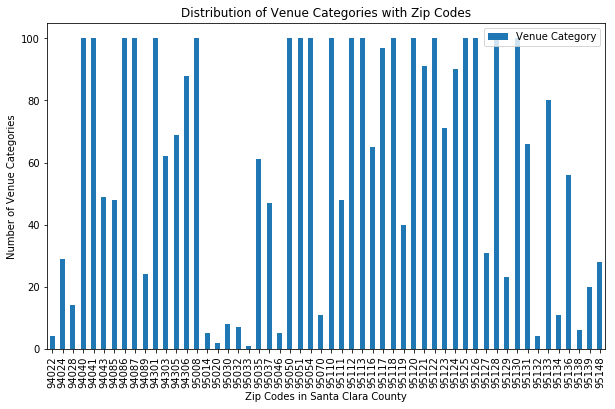

In [26]:
num_venues = venues[['Zip Code', 'Venue Category']].groupby('Zip Code').count()
import matplotlib.pyplot as plt
num_venues.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Zip Codes in Santa Clara County')
plt.ylabel('Number of Venue Categories')
plt.title('Distribution of Venue Categories with Zip Codes')
plt.show()

In [27]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 302 uniques categories.


## Analyzing Each Neighborhood

In [28]:
# one hot encoding
sc_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [29]:
# add zip code column back to dataframe
sc_onehot['Zip Code'] = venues['Zip Code'] 

In [30]:
# move zip code column to the first column
fixed_columns = [sc_onehot.columns[-1]] + list(sc_onehot.columns[:-1])
sc_onehot = sc_onehot[fixed_columns]

sc_onehot.head()

,Zip Code,ATM,Accessories Store,Acupuncturist,Airport,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bathing Area,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Rec Center,College Soccer Field,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Tha

In [31]:
sc_onehot.shape

(3261, 303)

### Group by Zip Code and take mean of frequency of occurence for each category

In [32]:
sc_grouped = sc_onehot.groupby('Zip Code').mean().reset_index()
sc_grouped.head()

,Zip Code,ATM,Accessories Store,Acupuncturist,Airport,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bathing Area,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Rec Center,College Soccer Field,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Tha

### Top 5 most common venues for each Neighborhood

In [33]:
num_top_venues = 5

for zc in sc_grouped['Zip Code']:
    print("----{}----".format(zc))
    temp = sc_grouped[sc_grouped['Zip Code'] == zc].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----94022----
       venue  freq
0       Park  0.50
1       Pool  0.25
2    Stables  0.25
3        ATM  0.00
4  Nightclub  0.00


----94024----
            venue  freq
0            Park  0.07
1   Shopping Mall  0.07
2   Grocery Store  0.07
3     Coffee Shop  0.07
4  Shipping Store  0.07


----94028----
             venue  freq
0             Park  0.21
1        Pet Store  0.14
2  Nature Preserve  0.14
3   Farmers Market  0.07
4    Grocery Store  0.07


----94040----
            venue  freq
0     Coffee Shop  0.05
1     Pizza Place  0.04
2  Sandwich Place  0.04
3            Park  0.03
4      Bagel Shop  0.03


----94041----
                venue  freq
0         Coffee Shop  0.06
1                Park  0.05
2         Supermarket  0.03
3     Bubble Tea Shop  0.03
4  Mexican Restaurant  0.03


----94043----
         venue  freq
0   Food Truck  0.08
1  Coffee Shop  0.06
2        Trail  0.06
3         Park  0.04
4    Gift Shop  0.04


----94085----
                      venue  freq
0         

                        venue  freq
0              Sandwich Place  0.06
1          Chinese Restaurant  0.05
2  Construction & Landscaping  0.05
3                 Coffee Shop  0.05
4            Asian Restaurant  0.05


----95132----
         venue  freq
0        Trail  0.50
1       Garden  0.25
2     Mountain  0.25
3       Museum  0.00
4  Music Store  0.00


----95133----
                   venue  freq
0            Pizza Place  0.06
1         Sandwich Place  0.05
2   Fast Food Restaurant  0.05
3      Convenience Store  0.04
4  Vietnamese Restaurant  0.04


----95134----
           venue  freq
0          Hotel  0.18
1          Trail  0.09
2      Cafeteria  0.09
3           Café  0.09
4  Bowling Alley  0.09


----95136----
            venue  freq
0     Pizza Place  0.05
1  Sandwich Place  0.05
2     Coffee Shop  0.04
3      Playground  0.04
4    Liquor Store  0.04


----95138----
                venue  freq
0          Steakhouse  0.17
1               Motel  0.17
2                Park  0.1

In [34]:
sc_grouped.head()

,Zip Code,ATM,Accessories Store,Acupuncturist,Airport,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bathing Area,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Rec Center,College Soccer Field,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Tha

### Enter data into a dataframe for top 10 venues in each zip code

In [35]:
#define a function
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sc_grouped['Zip Code']

for ind in np.arange(sc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94022,Park,Pool,Stables,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,94024,Grocery Store,Park,Coffee Shop,Shipping Store,Shopping Mall,ATM,Breakfast Spot,Basketball Court,Golf Course,Tennis Court
2,94028,Park,Pet Store,Nature Preserve,Grocery Store,Burger Joint,Trail,American Restaurant,Supplement Shop,Farmers Market,Tennis Court
3,94040,Coffee Shop,Pizza Place,Sandwich Place,Salon / Barbershop,Supermarket,Park,Sushi Restaurant,Bagel Shop,Gym / Fitness Center,Grocery Store
4,94041,Coffee Shop,Park,Supermarket,Mexican Restaurant,Ramen Restaurant,Playground,Bubble Tea Shop,Italian Restaurant,Sushi Restaurant,Japanese Restaurant


In [37]:
neighborhoods_venues_sorted=neighborhoods_venues_sorted.dropna()
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94022,Park,Pool,Stables,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,94024,Grocery Store,Park,Coffee Shop,Shipping Store,Shopping Mall,ATM,Breakfast Spot,Basketball Court,Golf Course,Tennis Court
2,94028,Park,Pet Store,Nature Preserve,Grocery Store,Burger Joint,Trail,American Restaurant,Supplement Shop,Farmers Market,Tennis Court
3,94040,Coffee Shop,Pizza Place,Sandwich Place,Salon / Barbershop,Supermarket,Park,Sushi Restaurant,Bagel Shop,Gym / Fitness Center,Grocery Store
4,94041,Coffee Shop,Park,Supermarket,Mexican Restaurant,Ramen Restaurant,Playground,Bubble Tea Shop,Italian Restaurant,Sushi Restaurant,Japanese Restaurant
5,94043,Food Truck,Coffee Shop,Trail,Volleyball Court,Gift Shop,Korean Restaurant,Italian Restaurant,Gym,Science Museum,Athletics & Sports
6,94085,Park,Hotel,Food Truck,Mediterranean Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hardware Store,Vietnamese Restaurant,Fast Food Restaurant
7,94086,Indian Restaurant,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Grocery Store,Coffee Shop,American Restaurant,Food Truck,Mediterranean Restaurant,Pet Store
8,94087,Indian Restaurant,Park,Coffee Shop,Pet Store,Gym / Fitness Center,Convenience Store,Grocery Store,Bubble Tea Shop,Bank,Pharmacy
9,94089,Food Truck,Gym / Fitness Center,Golf Course,Pub,Bagel Shop,Juice Bar,Gym,Gift Shop,Mediterranean Restaurant,Falafel Restaurant


## Clustering the Neighborhood

In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

sc_clustering = sc_grouped.drop('Neighborhood', 1)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sc_clustering)
    kmeanModel.fit(sc_clustering)
    distortions.append(sum(np.min(cdist(sc_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sc_clustering.shape[0])


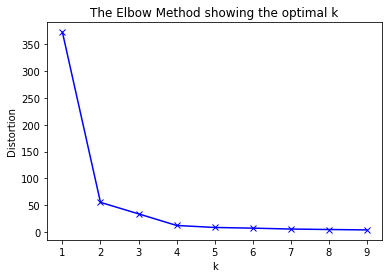

In [39]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimization shows that k=2 is the optimal number of clusters, however in order to  

In [40]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sc_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
#neighborhoods_venues_sorted.drop(columns = 'Cluster Labels', inplace = True) 
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sc_merged = df_data
sc_merged = sc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zip Code')
sc_merged = sc_merged.dropna(axis=0)
sc_merged['Cluster Labels'] = sc_merged['Cluster Labels'].astype(int)
sc_merged.head()

,Zip Code,City,Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94022,Los Altos,4397,37.365997,-122.152170,1,Park,Pool,Stables,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,94024,Los Altos,3710,37.357054,-122.094332,1,Grocery Store,Park,Coffee Shop,Shipping Store,Shopping Mall,ATM,Breakfast Spot,Basketball Court,Golf Course,Tennis Court
2,94028,Los Altos,5241,37.375511,-122.222075,1,Park,Pet Store,Nature Preserve,Grocery Store,Burger Joint,Trail,American Restaurant,Supplement Shop,Farmers Market,Tennis Court
3,94040,Mountain View,3761,37.377220,-122.087655,1,Coffee Shop,Pizza Place,Sandwich Place,Salon / Barbershop,Supermarket,Park,Sushi Restaurant,Bagel Shop,Gym / Fitness Center,Grocery Store
4,94041,Mountain View,3665,37.387985,-122.073900,1,Coffee Shop,Park,Supermarket,Mexican Restaurant,Ramen Restaurant,Playground,Bubble Tea Shop,Italian Restaurant,Sushi Restaurant,Japanese Restaurant


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sc_merged['Latitude'], sc_merged['Longitude'], sc_merged['City'], sc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Segmenting Rent Level and Venue Cluster

In [44]:
bins = np.linspace(min(sc_merged["Rent"]), max(sc_merged["Rent"]), 4)
bins

array([2556., 3451., 4346., 5241.])

In [45]:
rent_level = ['Low', 'Average', 'High']

In [46]:
sc_merged['Rent Level'] = pd.cut(sc_merged['Rent'], bins, labels=rent_level, include_lowest=True )
sc_merged[['Rent','Rent Level']].head()

,Rent,Rent Level
0,4397,High
1,3710,Average
2,5241,High
3,3761,Average
4,3665,Average


In [47]:
cluster_cat=['Restaurants, Coffee Shops and Stores', 'Parks, Grocery Stores, Eateries', 'Hotels and Social Venues','Parks, Hills, Restaurants']

In [48]:
bins_cluster = np.linspace(min(sc_merged["Cluster Labels"]), max(sc_merged["Cluster Labels"]), 5)
bins_cluster

array([0.  , 0.75, 1.5 , 2.25, 3.  ])

In [49]:
sc_merged['Cluster Group'] = pd.cut(sc_merged['Cluster Labels'], bins_cluster, labels=cluster_cat, include_lowest=True )
sc_merged[['Cluster Labels','Cluster Group']].head()

,Cluster Labels,Cluster Group
0,1,"Parks, Grocery Stores, Eateries"
1,1,"Parks, Grocery Stores, Eateries"
2,1,"Parks, Grocery Stores, Eateries"
3,1,"Parks, Grocery Stores, Eateries"
4,1,"Parks, Grocery Stores, Eateries"


## Examing the Clusters

### Cluster 0

In [50]:
sc_merged[sc_merged['Cluster Labels']==0]

,Zip Code,City,Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Rent Level,Cluster Group
27,95110,San Jose,2849,37.345985,-121.905870,0,Mexican Restaurant,Sushi Restaurant,Burger Joint,Japanese Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Grocery Store,BBQ Joint,Bar,Low,"Restaurants, Coffee Shops and Stores"
28,95111,San Jose,2731,37.283895,-121.824495,0,Convenience Store,Mexican Restaurant,Pizza Place,Food Truck,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Grocery Store,Park,Café,Low,"Restaurants, Coffee Shops and Stores"
29,95112,San Jose,2962,37.343880,-121.882705,0,Mexican Restaurant,Coffee Shop,Sandwich Place,Cocktail Bar,Sushi Restaurant,Pub,Pizza Place,Vietnamese Restaurant,Bar,Ice Cream Shop,Low,"Restaurants, Coffee Shops and Stores"
30,95113,San Jose,3545,37.332955,-121.892055,0,Mexican Restaurant,Cocktail Bar,Coffee Shop,Art Gallery,Bar,Sandwich Place,Hotel,Ice Cream Shop,Pub,Theater,Average,"Restaurants, Coffee Shops and Stores"
31,95116,San Jose,2692,37.348635,-121.851565,0,Mexican Restaurant,Convenience Store,Video Store,Sandwich Place,Fast Food Restaurant,Mobile Phone Shop,Bakery,Grocery Store,Pharmacy,Coffee Shop,Low,"Restaurants, Coffee Shops and Stores"
32,95117,San Jose,3072,37.309490,-121.963753,0,Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Japanese Restaurant,Ramen Restaurant,Bubble Tea Shop,Dessert Shop,Donut Shop,Vietnamese Restaurant,Low,"Restaurants, Coffee Shops and Stores"
33,95118,San Jose,2819,37.256597,-121.889709,0,Grocery Store,Coffee Shop,Bakery,Pharmacy,Pizza Place,Mexican Restaurant,Burger Joint,Pet Store,Fast Food Restaurant,Convenience Store,Low,"Restaurants, Coffee Shops and Stores"
34,95119,San Jose,2921,37.223935,-121.784173,0,Fast Food Restaurant,Coffee Shop,Trail,Sandwich Place,Park,Bank,Juice Bar,Japanese Restaurant,Clothing Store,Thrift / Vintage Store,Low,"Restaurants, Coffee Shops and Stores"
35,95120,San Jose,3168,37.242605,-121.874830,0,Burger Joint,Coffee Shop,Cosmetics Shop,Candy Store,Pet Store,Furniture / Home Store,Mexican Restaurant,Pizza Place,Grocery Store,Shopping Mall,Low,"Restaurants, Coffee Shops and Stores"
36,95121,San Jose,2721,37.303860,-121.808116,0,Vietnamese Restaurant,Bubble Tea Shop,Coffee Shop,Intersection,Fast Food Restaurant,Playground,Fried Chicken Joint,Sandwich Place,Park,Cajun / Creole Restaurant,Low,"Restaurants, Coffee Shops and Stores"


### Cluster 1

In [51]:
sc_merged[sc_merged['Cluster Labels']==1]

,Zip Code,City,Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Rent Level,Cluster Group
0,94022,Los Altos,4397,37.365997,-122.152170,1,Park,Pool,Stables,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,High,"Parks, Grocery Stores, Eateries"
1,94024,Los Altos,3710,37.357054,-122.094332,1,Grocery Store,Park,Coffee Shop,Shipping Store,Shopping Mall,ATM,Breakfast Spot,Basketball Court,Golf Course,Tennis Court,Average,"Parks, Grocery Stores, Eateries"
2,94028,Los Altos,5241,37.375511,-122.222075,1,Park,Pet Store,Nature Preserve,Grocery Store,Burger Joint,Trail,American Restaurant,Supplement Shop,Farmers Market,Tennis Court,High,"Parks, Grocery Stores, Eateries"
3,94040,Mountain View,3761,37.377220,-122.087655,1,Coffee Shop,Pizza Place,Sandwich Place,Salon / Barbershop,Supermarket,Park,Sushi Restaurant,Bagel Shop,Gym / Fitness Center,Grocery Store,Average,"Parks, Grocery Stores, Eateries"
4,94041,Mountain View,3665,37.387985,-122.073900,1,Coffee Shop,Park,Supermarket,Mexican Restaurant,Ramen Restaurant,Playground,Bubble Tea Shop,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Average,"Parks, Grocery Stores, Eateries"
5,94043,Mountain View,3632,37.420265,-122.071545,1,Food Truck,Coffee Shop,Trail,Volleyball Court,Gift Shop,Korean Restaurant,Italian Restaurant,Gym,Science Museum,Athletics & Sports,Average,"Parks, Grocery Stores, Eateries"
6,94085,Sunnyvale,3176,37.388844,-122.017602,1,Park,Hotel,Food Truck,Mediterranean Restaurant,Sandwich Place,Sushi Restaurant,Gym,Hardware Store,Vietnamese Restaurant,Fast Food Restaurant,Low,"Parks, Grocery Stores, Eateries"
7,94086,Sunnyvale,3323,37.369645,-122.014825,1,Indian Restaurant,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Grocery Store,Coffee Shop,American Restaurant,Food Truck,Mediterranean Restaurant,Pet Store,Low,"Parks, Grocery Stores, Eateries"
8,94087,Sunnyvale,3379,37.352195,-122.034850,1,Indian Restaurant,Park,Coffee Shop,Pet Store,Gym / Fitness Center,Convenience Store,Grocery Store,Bubble Tea Shop,Bank,Pharmacy,Low,"Parks, Grocery Stores, Eateries"
9,94089,Sunnyvale,3482,37.417705,-122.026760,1,Food Truck,Gym / Fitness Center,Golf Course,Pub,Bagel Shop,Juice Bar,Gym,Gift Shop,Mediterranean Restaurant,Falafel Restaurant,Average,"Parks, Grocery Stores, Eateries"


### Cluster 2

In [52]:
sc_merged[sc_merged['Cluster Labels']==2]

,Zip Code,City,Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Rent Level,Cluster Group
10,94301,Palo Alto,4487,37.442270,-122.155080,2,Ice Cream Shop,Yoga Studio,Spa,Café,Hotel,Coffee Shop,New American Restaurant,Burger Joint,Chinese Restaurant,Sandwich Place,High,Hotels and Social Venues
11,94303,Palo Alto,3551,37.440542,-122.118695,2,Coffee Shop,Food Truck,Park,Baseball Field,Café,Bank,Gym,Golf Course,Salon / Barbershop,Ice Cream Shop,Average,Hotels and Social Venues
12,94305,Palo Alto,4394,37.423600,-122.171425,2,Coffee Shop,Café,College Cafeteria,Fountain,Sculpture Garden,Trail,Art Museum,Park,Monument / Landmark,Sandwich Place,High,Hotels and Social Venues
13,94306,Palo Alto,3884,37.413275,-122.130890,2,Hotel,Park,Rental Car Location,Spa,Mexican Restaurant,Gym,Pizza Place,American Restaurant,Chinese Restaurant,Coffee Shop,Average,Hotels and Social Venues


### Cluster 3

In [53]:
sc_merged[sc_merged['Cluster Labels']==3]

,Zip Code,City,Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Rent Level,Cluster Group
14,95008,Campbell,3096,37.278983,-121.953956,3,Mexican Restaurant,Fast Food Restaurant,Italian Restaurant,Sandwich Place,Coffee Shop,Intersection,Park,Convenience Store,Donut Shop,BBQ Joint,Low,"Parks, Hills, Restaurants"
15,95014,Cupertino,3449,37.295937,-122.088127,3,Trail,Winery,Lake,Nature Preserve,Food Truck,Financial or Legal Service,Football Stadium,Fabric Shop,Falafel Restaurant,Farm,Low,"Parks, Hills, Restaurants"
16,95020,Gilroy,2556,37.039315,-121.544640,3,Stadium,Farm,Yoga Studio,Flea Market,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Low,"Parks, Hills, Restaurants"
17,95030,Los Gatos,3600,37.230172,-122.001447,3,Trail,Food Truck,Bathing Area,Wine Bar,American Restaurant,Diner,Park,Restaurant,Financial or Legal Service,Fabric Shop,Average,"Parks, Hills, Restaurants"
18,95032,Los Gatos,3358,37.227586,-121.944307,3,Baseball Field,Yoga Studio,Home Service,Park,Trail,Dessert Shop,Flea Market,Falafel Restaurant,Farm,Farmers Market,Low,"Parks, Hills, Restaurants"
19,95033,Los Gatos,3123,37.172610,-121.942634,3,Scenic Lookout,Yoga Studio,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Low,"Parks, Hills, Restaurants"
20,95035,Milpitas,3014,37.439605,-121.881590,3,Park,Pizza Place,Coffee Shop,Vietnamese Restaurant,Gas Station,Sandwich Place,Gym,Spa,Liquor Store,Indian Restaurant,Low,"Parks, Hills, Restaurants"
21,95037,Morgan Hill,2913,37.158153,-121.640763,3,Coffee Shop,Sandwich Place,Burger Joint,Mobile Phone Shop,Sporting Goods Shop,Fast Food Restaurant,Video Game Store,Pizza Place,Hotel,Mattress Store,Low,"Parks, Hills, Restaurants"
22,95046,San Martin,2928,37.097029,-121.576037,3,Racetrack,Farm,Park,Pizza Place,Pet Store,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Low,"Parks, Hills, Restaurants"
23,95050,Santa Clara,3081,37.356525,-121.950465,3,Mexican Restaurant,Korean Restaurant,Sandwich Place,Thai Restaurant,Hotel,Pizza Place,Chinese Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Low,"Parks, Hills, Restaurants"


In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rent, mark in zip(sc_merged['Latitude'], sc_merged['Longitude'], 
                                        sc_merged['City'], sc_merged['Cluster Group'], 
                                              sc_merged['Rent Level'], sc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ': ' + str(rent) + ' Rent: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[mark-1],
        fill=True,
        fill_color=rainbow[mark-1],
        fill_opacity=0.7, 
        tooltip= 'Click Me!').add_to(map_clusters)
       
map_clusters

In [75]:
sc_short=sc_merged[['Zip Code', 'City','Rent Level','Cluster Group']]

In [76]:
sc_short[sc_short['Rent Level']=='High']

,Zip Code,City,Rent Level,Cluster Group
0,94022,Los Altos,High,"Parks, Grocery Stores, Eateries"
2,94028,Los Altos,High,"Parks, Grocery Stores, Eateries"
10,94301,Palo Alto,High,Hotels and Social Venues
12,94305,Palo Alto,High,Hotels and Social Venues


In [77]:
sc_short[sc_short['Rent Level']=='Average']

,Zip Code,City,Rent Level,Cluster Group
1,94024,Los Altos,Average,"Parks, Grocery Stores, Eateries"
3,94040,Mountain View,Average,"Parks, Grocery Stores, Eateries"
4,94041,Mountain View,Average,"Parks, Grocery Stores, Eateries"
5,94043,Mountain View,Average,"Parks, Grocery Stores, Eateries"
9,94089,Sunnyvale,Average,"Parks, Grocery Stores, Eateries"
11,94303,Palo Alto,Average,Hotels and Social Venues
13,94306,Palo Alto,Average,Hotels and Social Venues
17,95030,Los Gatos,Average,"Parks, Hills, Restaurants"
26,95070,Saratoga,Average,"Parks, Hills, Restaurants"
30,95113,San Jose,Average,"Restaurants, Coffee Shops and Stores"


In [78]:
sc_short[sc_short['Rent Level']=='Low']

,Zip Code,City,Rent Level,Cluster Group
6,94085,Sunnyvale,Low,"Parks, Grocery Stores, Eateries"
7,94086,Sunnyvale,Low,"Parks, Grocery Stores, Eateries"
8,94087,Sunnyvale,Low,"Parks, Grocery Stores, Eateries"
14,95008,Campbell,Low,"Parks, Hills, Restaurants"
15,95014,Cupertino,Low,"Parks, Hills, Restaurants"
16,95020,Gilroy,Low,"Parks, Hills, Restaurants"
18,95032,Los Gatos,Low,"Parks, Hills, Restaurants"
19,95033,Los Gatos,Low,"Parks, Hills, Restaurants"
20,95035,Milpitas,Low,"Parks, Hills, Restaurants"
21,95037,Morgan Hill,Low,"Parks, Hills, Restaurants"
